# Multiple Linear Regression
这个代码演示了多元线性回归的例子。它使用了波士顿房价数据集，并使用线性回归模型来预测房价。

## 导入库

In [2]:
from sklearn.datasets import load_boston  # 导入波士顿房价数据集
from sklearn.linear_model import LinearRegression  # 导入线性回归模型
import matplotlib.pyplot as plt  # 导入绘图模块
from sklearn.model_selection import train_test_split


## 导入数据

In [3]:
dataset = load_boston()
x_data = dataset.data  # 导入所有特征变量
y_data = dataset.target  # 导入目标值（房价）
name_data = dataset.feature_names  # 导入特征

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


C:\Users\29492\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californi

## 划分训练集和测试集

In [4]:
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data, test_size=0.25, random_state=1001)  # 划分训练集和测试集


## 创建线性回归模型并拟合数据

In [5]:
mlr_model = LinearRegression()
mlr_model.fit(x_train, y_train)  # 训练模型


LinearRegression()

## 对测试集进行预测并绘制结果
通过绘制这两个散点图，我们可以观察到实际房价与模型预测房价之间的差异，从而评估模型的拟合效果。如果散点图中的点分布比较接近一条直线，并且红色点和蓝色点的分布趋势相似，那么说明模型对房价的预测相对准确；如果散点图中的点分布比较分散或者红色点和蓝色点的分布趋势不一致，那么说明模型的预测可能存在较大的误差。

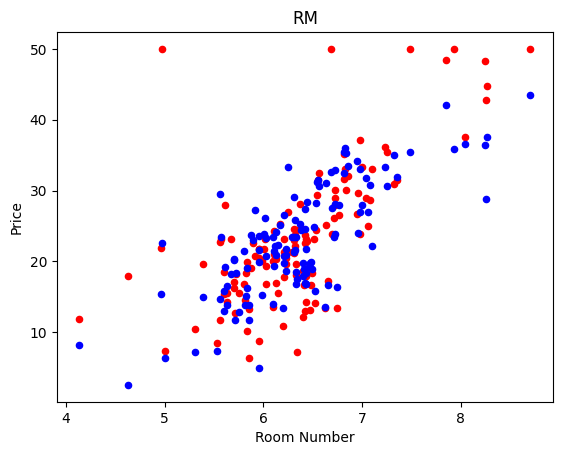

In [6]:
y_test_p = mlr_model.predict(x_test)  # 预测测试集

plt.subplot(1, 1, 1)
# 绘制了红色的散点图，其中横坐标为 x_test 数据集中的第 5 列（即第 6 个特征变量，因为 Python 中的索引是从 0 开始的），纵坐标为 y_test 数据集（房价）。这个散点图表示了实际房价与第 6 个特征变量（房间数量）之间的关系。
plt.scatter(x_test[:, 5], y_test, s=20, color="r")
# 绘制了蓝色的散点图，其中横坐标同样是 x_test 数据集中的第 5 列，纵坐标是通过训练好的线性回归模型 mlr_model 对 x_test 数据集进行预测得到的预测值 y_test_p。这个散点图表示了模型对房价的预测值与第 6 个特征变量（房间数量）之间的关系。
plt.scatter(x_test[:, 5], y_test_p, s=20, color="b")
plt.xlabel('Room Number')
plt.ylabel('Price')
plt.title(name_data[5])
plt.show()


## 计算回归模型的确定系数（coefficient of determination）
确定系数是衡量回归模型拟合优度的指标，其取值范围在0到1之间。该值越接近1，表示模型对观测数据的解释能力越强，拟合效果越好；而越接近0，则表示模型的解释能力较弱，拟合效果较差。

In [7]:
r_squared = mlr_model.score(x_test, y_test) 
print('R2 = %s' % r_squared)


R2 = 0.6783942923302057
